# Part 03 EAD

# 0.0. Imports

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Statistics
from scipy import stats
from pandas_profiling import ProfileReport

# Graphs
import matplotlib.pyplot as plt
import seaborn as sns

# Load images
from IPython.display import Image

# Warning
import warnings
warnings.filterwarnings( 'ignore' )

## 0.1. Helper Functions

In [2]:
# Percentual plot
def percentual_count(var: str, dataset: pd.DataFrame):
    ax = sns.countplot(y=var, data=dataset)
    total = len(dataset[var])
    for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/total)
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y))
    return plt.show()

In [3]:
# Checking outliers function:
def drop_outliers(var: str, dataset: pd.DataFrame):

    # find Q1, Q3 e IQR
    Q1 = np.quantile(dataset[var], .25)
    Q3 = np.quantile(dataset[var], .75)
    IQR = Q3 - Q1

    # calculates the outliers boundaries through statistical relationship
    high = Q3 + 1.5 * IQR

    return print(f'For {var} the high outliers {high}')

In [4]:

def cramers_corrected_stat(x, y):
    """ calculate Cramers V statistic for categorial-categorial association.
    """
    # Calculate confusion matrix
    cm = pd.crosstab(x, y).values
    n = cm.sum()
    r, k = cm.shape

    # Calculate chi2
    chi2 = stats.chi2_contingency(cm)[0]
    # Calculate chi2 correction
    chi2corr = max(0, chi2 - (k-1)*(r-1)/(n-1))
    # K correction
    kcorr = k - (k-1)**2/(n-1)
    # R correction
    rcorr = r - (r-1)**2/(n-1)
    
    return np.sqrt((chi2corr/n) / (min(kcorr-1, rcorr-1)))

# 4.0. Exploratory Data Analysis

In [5]:
# Load dataset
feature_dtypes = {'step': 'int16',
                  'type': 'category',
                  'amount': 'float32',
                  'name_orig': 'object',
                  'oldbalance_orig': 'float32',
                  'newbalance_orig': 'float32',
                  'name_dest': 'object',
                  'oldbalance_dest': 'float32',
                  'newbalance_dest': 'float32',
                  'is_fraud': 'uint8',
                  'is_flagged_fraud': 'uint8',
                  'error_orig' : 'float32',
                  'error_dest' : 'float32',
                  'dest_type' : 'category',
                  'days' : 'int8'}

df2 = pd.read_csv('dataset\df2.csv', dtype=feature_dtypes)

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 15 columns):
 #   Column            Dtype   
---  ------            -----   
 0   step              int16   
 1   type              category
 2   amount            float32 
 3   name_orig         object  
 4   oldbalance_orig   float32 
 5   newbalance_orig   float32 
 6   name_dest         object  
 7   oldbalance_dest   float32 
 8   newbalance_dest   float32 
 9   is_fraud          uint8   
 10  is_flagged_fraud  uint8   
 11  error_orig        float32 
 12  error_dest        float32 
 13  dest_type         category
 14  days              int8    
dtypes: category(2), float32(7), int16(1), int8(1), object(2), uint8(2)
memory usage: 309.5+ MB


## 4.1. Pandas Profiling

In [7]:
#profile = ProfileReport(df2, title='EDA', html={'style':{'full_width':True}})
#profile.to_file(output_file="Profile01.html")

## 4.2. Univariate Analysis

### 4.2.1. Target Variable

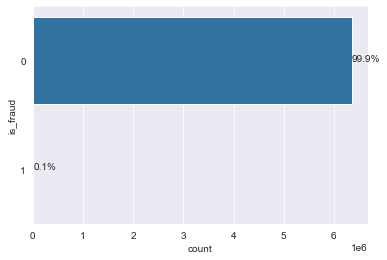

The ratio of fraud to non-fraud is:
0    6354407
1       8213
Name: is_fraud, dtype: int64


In [8]:
# Plot target variable
sns.set_style('darkgrid')
# Check helper functio subsection
percentual_count('is_fraud', df2)

print('The ratio of fraud to non-fraud is:')
print(df2.is_fraud.value_counts())

* 0.1% of transactions are fraudulent
* The dataset is imbalanced.

### 4.2.2. Numerical Variables Distribution

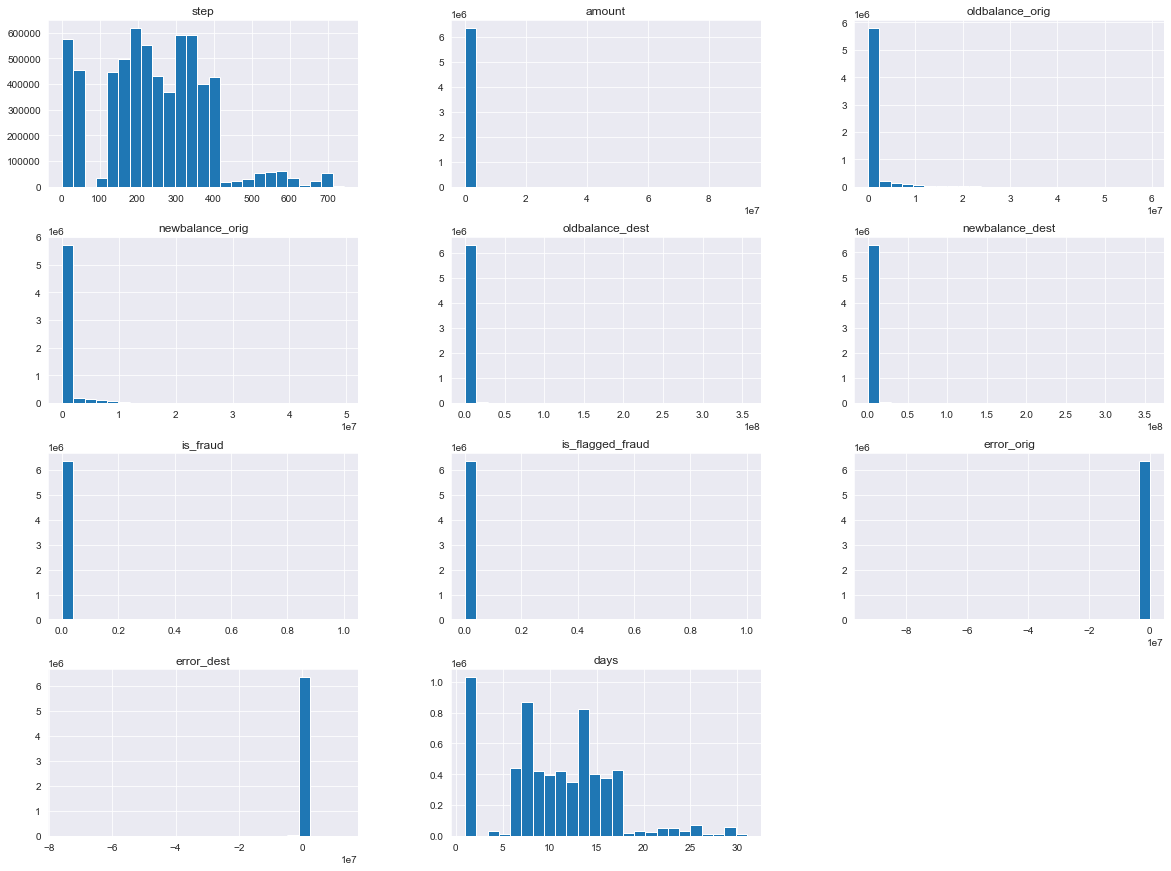

In [9]:
# Selecting Numerical features
numerical_df2 = df2.select_dtypes(exclude=['object', 'category'])

# Plot numerical
numerical_df2.hist(figsize=(20,15), bins=25)
plt.show()

* Some graphics are difficult to view. To solve this we will use log normalize
* `oldbalance_orig` and `newbalance_orig` are right skewed
* High outliers influence

In [58]:
# Log transformation
numerical_cols = numerical_df2.columns
numerical_log_df2 = numerical_df2

for i in range(len(numerical_cols)):
    numerical_log_df2.loc[i] = numerical_log_df2.loc[i].apply(lambda x: 0 if x==0 else np.log1p(x))

# Fill NaN values
numerical_log_df2=numerical_log_df2.fillna(0)

,step,amount,oldbalance_orig,newbalance_orig,oldbalance_dest,newbalance_dest,is_fraud,is_flagged_fraud,error_orig,error_dest,days
0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0
1,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0
2,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0
3,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0
4,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743.0,1.286475,1.286475,0.0,0.000000,2.620003,1.0,0.0,-0.005025,0.004975,31.0
6362616,743.0,1.338386,1.338386,0.0,0.000000,0.000000,1.0,0.0,0.000000,2.812883,31.0
6362617,743.0,1.338386,1.338386,0.0,2.496048,2.813530,1.0,0.0,0.000000,0.256710,31.0
6362618,743.0,1.304174,1.304174,0.0,0.000000,0.000000,1.0,0.0,0.000000,2.684645,31.0


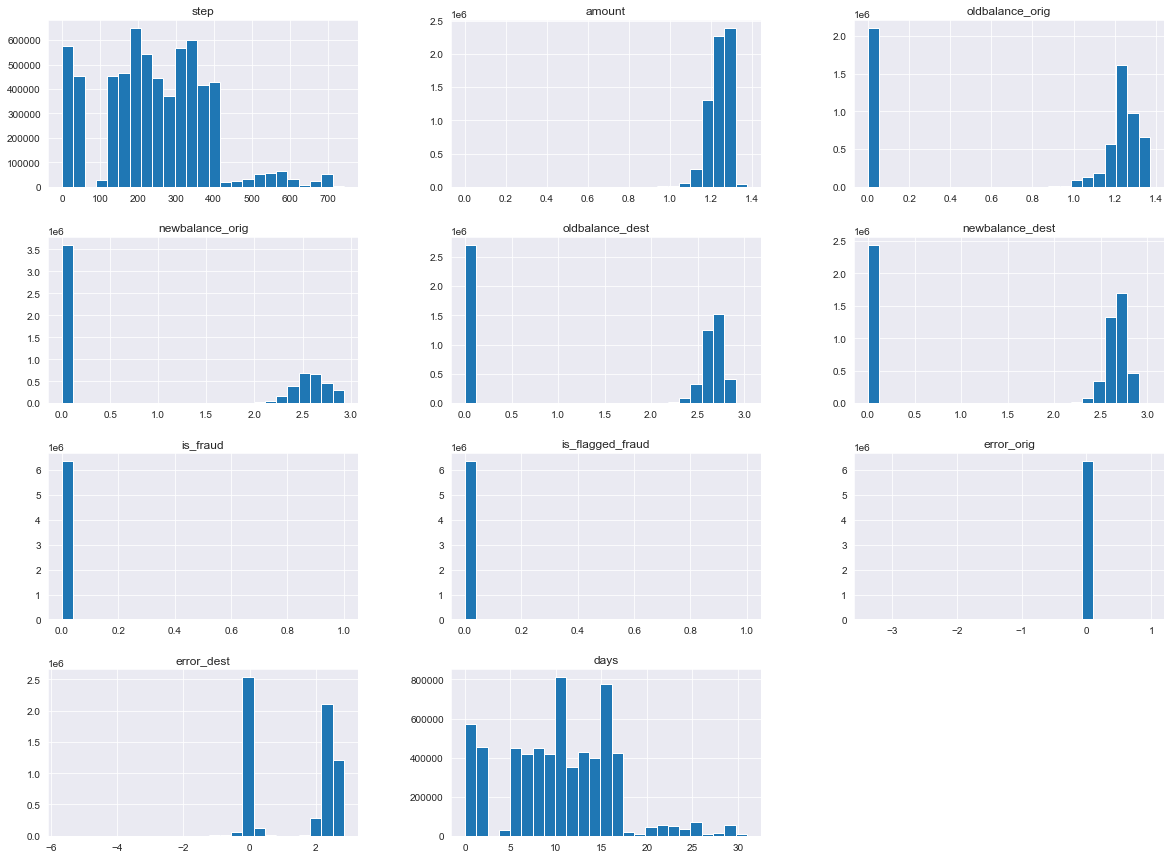

In [60]:
# Plot Numerical features log
numerical_log_df2.hist(figsize=(20,15), bins=25)
plt.show()


In [10]:
# Checking percentiles to deal with outliers
columns_outliers = ['amount', 'oldbalance_orig', 'newbalance_orig',
       'oldbalance_dest', 'newbalance_dest']
for cols in columns_outliers:
    drop_outliers(cols, numerical_df2)

For amount the high outliers 501719.345703125
For oldbalance_orig the high outliers 268287.939453125
For newbalance_orig the high outliers 360646.015625
For oldbalance_dest the high outliers 2357591.71875
For newbalance_dest the high outliers 2779773.046875


### 4.2.2. Categorical Variable

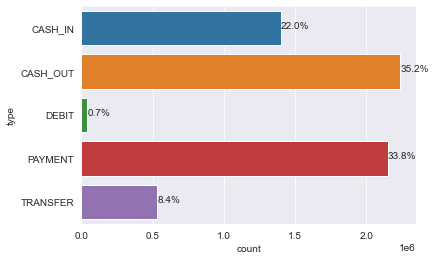

In [61]:
# Selecting categorical features
cat_attr = df2.select_dtypes(include=['object', 'category'])

# Countplot
percentual_count('type', cat_attr)
plt.show()

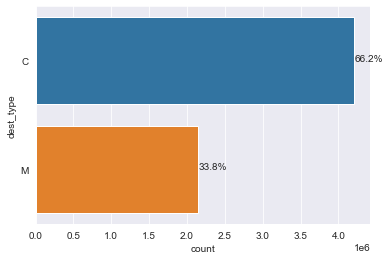

In [62]:
# Checking customer
percentual_count('dest_type', cat_attr)
plt.show()

## 4.3. Bivariate Analysis

### H1. Frauds occur with 3 types of transfers.
**FALSE**: There's only two types of fraudulent transactions: `CASH_OUT` and `TRANSFER`.

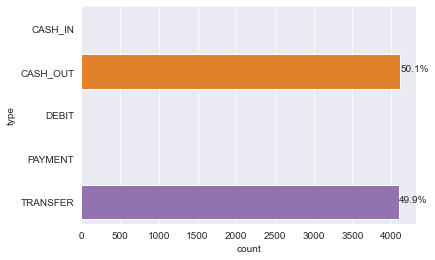

In [63]:
# Dataset with fraudulent transactions
h1 = df2[df2.is_fraud == 1]

# Countplot fraudulent types
percentual_count('type', h1)
plt.show()

### H2. Fraud occur with low values amounts.
**TRUE**: Fraudulent transactions occur more frequently at lower amounts

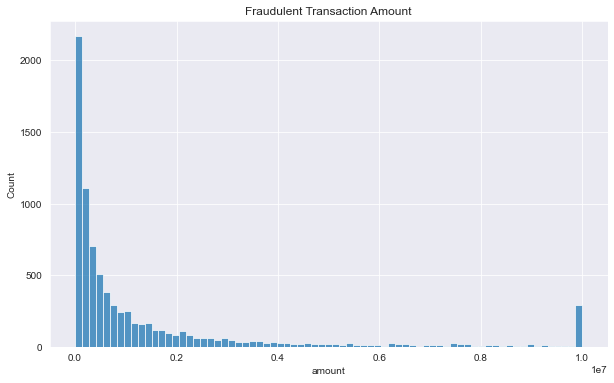

In [64]:
# Histplot fraud amount
plt.figure(figsize=(10, 6))
sns.histplot(data=h1.amount)
plt.title('Fraudulent Transaction Amount')
plt.show()

### H3. Fraud occur with high values of old balance origin.
**TRUE**: Fraud occur with high values, but on a smaller scale.

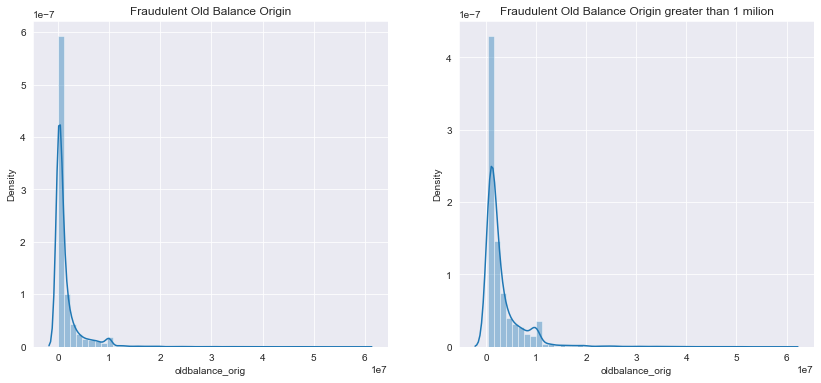

In [75]:
# Histplot fraud old balance origin
plt.figure(figsize=(14, 6))

# Histplot for old balance origin
plt.subplot(1,2,1)
sns.distplot(h1.oldbalance_orig)
plt.title('Fraudulent Old Balance Origin')

# Histplot for high value old balance origin
plt.subplot(1,2,2)
sns.distplot(h1[h1.oldbalance_orig > 5e5]['oldbalance_orig'])
plt.title('Fraudulent Old Balance Origin greater than 1 milion')
plt.show()

### H4. Fraud occur with new balance origin is equal zero.
**TRUE**: Fraud generally occur when the New Balance Origin is equal zero.

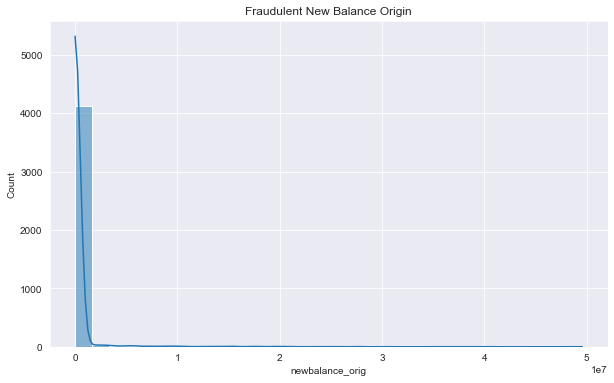

In [76]:
plt.figure(figsize=(10,6))
sns.histplot(h1.newbalance_orig[h1.oldbalance_orig > 4e5], kde=True, bins=30)
plt.title('Fraudulent New Balance Origin')
plt.show()

### H5. Fraud occur with low values old balance destination.
**TRUE**

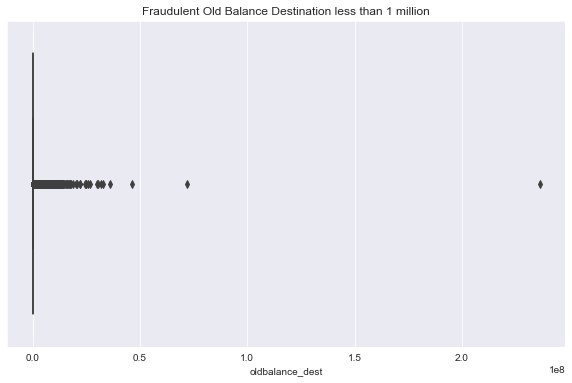

In [78]:
plt.figure(figsize=(10,6))
sns.boxplot(h1.oldbalance_dest)
plt.title('Fraudulent Old Balance Destination less than 1 million')
plt.show()

### H6. All fraudulent transaction occur with new receiver balance equal zero.
**FALSE**: Some balance destination are greater than zero.

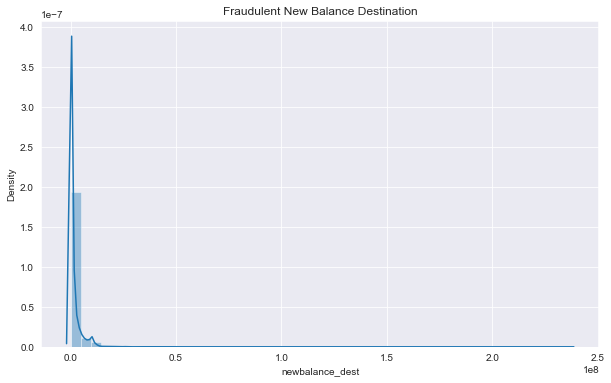

In [68]:
plt.figure(figsize=(10,6))
sns.distplot(h1.newbalance_dest)
plt.title('Fraudulent New Balance Destination')
plt.show()

### H7. Customer to customer transactions represent 50% of the total fraudulent transactions.
**FALSE**: 100% of fraudulent transactions are customer-to-customer.

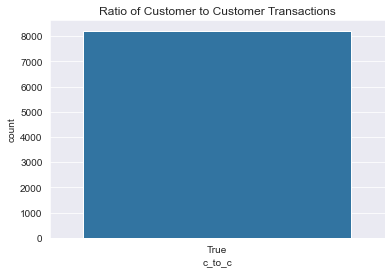

In [69]:
# Customer feature with initial letter
h1['origin_type'] = h1.name_orig.str.replace(r'[0-9]', regex=True, repl='')

# True if customer to customer
c_to_c = (h1.origin_type == h1.dest_type)

# Creating column customer to customer
h1['c_to_c'] = c_to_c

# Plot bar
sns.countplot(data=h1, x='c_to_c')
plt.title('Ratio of Customer to Customer Transactions')
plt.show()

### H8. Merchant receiver represents 40% of the total fraudulent transactions.
**FALSE**: None of fraudulent transactions are for merchants.

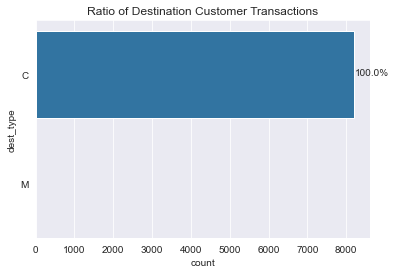

In [70]:
plt.title('Ratio of Destination Customer Transactions')
percentual_count('dest_type', h1)
plt.show()

### H9. Most Fraud occurs between days 10 and 20.
**FALSE**: Fraud occur between days 20 and 31.

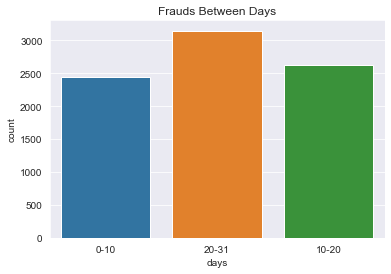

In [85]:
sns.countplot(h1.days.apply(lambda x: '0-10' if x < 10 else ('10-20' if 10 < x < 21 else '20-31' )))
plt.title('Frauds Between Days')
plt.show()

### H10. All flagged frauds represent 90% of frauds transactions.
**FALSE**: 0.2% of the total fraudulent transactions are flagged as fraud.

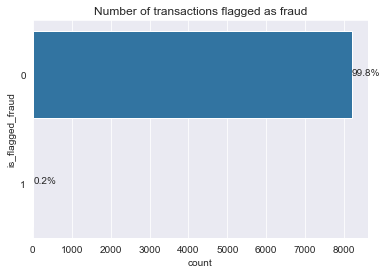

In [72]:
plt.title('Number of transactions flagged as fraud')
percentual_count('is_flagged_fraud', h1)
plt.show()

### 4.3.1. Hypotheses summary

| #    | HYPOTHESES                                                   | CONCLUSION |
| ---- | ------------------------------------------------------------ | :--------- |
| h1   | Frauds occur with 3 types of transfers.                      | TRUE       |
| h2   | Fraud occur with low values amounts.                         | TRUE       |
| h3   | Fraud occur with high values of old origin balance.          | TRUE       |
| h4   | Fraud occur with new balance origin is equal zero.           | TRUE       |
| h5   | Fraud occur with low values old balance destination.         | TRUE       |
| h6   | All fraudulent transaction occur with new receiver balance equal zero. | FALSE      |
| h7   | Customer to customer transactions represent 50% of the total fraudulent transactions. | FALSE      |
| h8   | Merchant receiver represents 40% of the total fraudulent transactions. | FALSE      |
| h9   | Fraud occurs after the 10th.                                 | FALSE      |
| h10  | All flagged frauds represent 90% of fraud transactions.      | FALSE      |

## 4.4. Multivariate Analysis

### 4.4.1. Numerical Variables

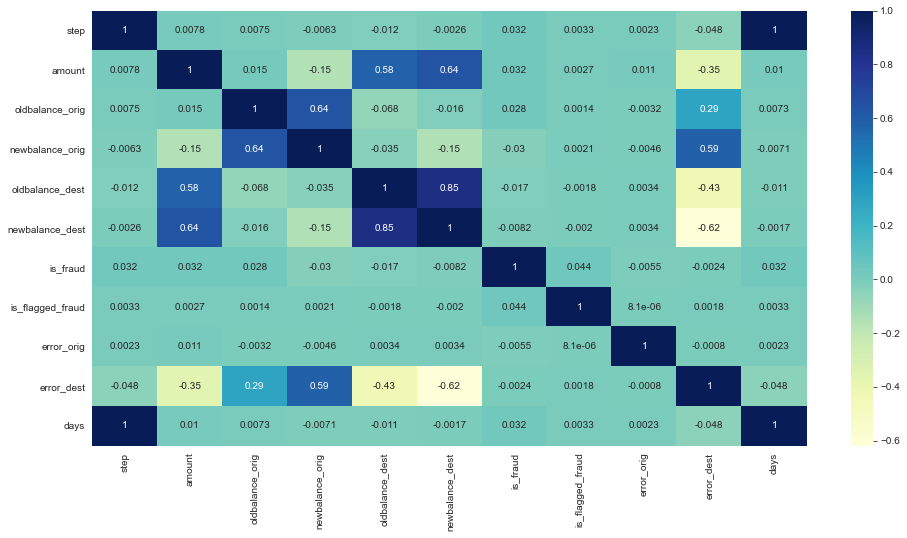

In [73]:
plt.figure(figsize=(16,8))
sns.heatmap(numerical_df2.corr(), annot=True, cmap='YlGnBu')
plt.show()

### 4.4.2. Categorical Variables

Using Panda's Profiling to visualize the correlation between categorical variables, the Cramér's V is an association measure for nominal random variables. The coefficient ranges from 0 to 1, with 0 indicating independence and 1 indicating perfect association.

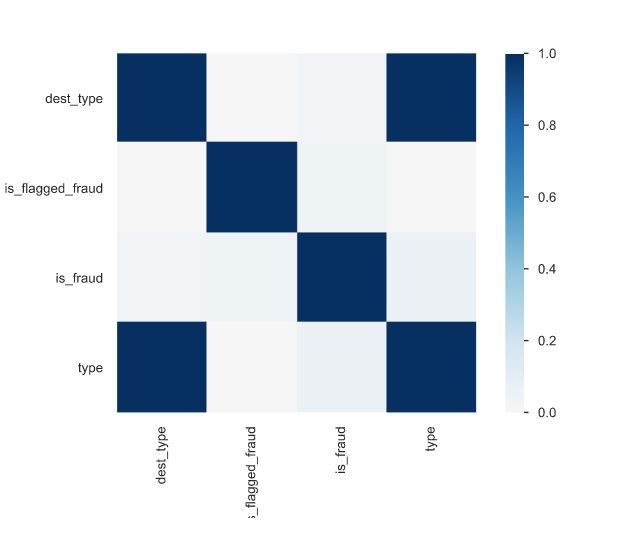

In [74]:
Image('image\crammer.JPG')